In [2]:
import pandas as pd
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter
from matplotlib import pyplot as plt
import seaborn as sns
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option('display.max_rows', 500)

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline


In [5]:
df=pd.read_pickle("df_final_impute_A.pkl")
df=df.drop(["Length_of_staymedian","Survivalmedian"],axis=1)
df

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemean,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,Genderfirst,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,ICUTypemax,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVentmax,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,Length_of_staymean,Survivalmean,In-hospital_deathmax,new_Heightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,new_Weightfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Hypertension,Tachypnea,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Urine24h,Renal Injury,BMI_Cat
0,132539,75.0,80.0,78.0,78.0,79.0,29.0,33.0,31.0,31.0,31.0,41.0,49.0,46.000000,46.0,46.0,54.0,2900.0,3000.0,3000.0,3000.0,3000.0,8.0,13.0,10.500000,10.5,13.0,0.6,0.7,0.700000,0.7,0.7,152.0,153.0,153.0,153.0,153.0,0.7,0.8,0.750000,0.75,0.8,42.0,81.0,58.765625,58.0,65.0,0.4,1.0,0.526667,0.5,1.0,14.0,0.0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.50,33.7,58.0,86.0,71.411765,73.0,73.0,4.0,4.0,4.4,4.20,4.20,4.4,1.4,2.3,1.883333,1.8,1.9,58.0,109.0,79.070455,78.0,92.33,0.0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,34.0,46.0,39.727273,39.0,40.0,81.0,228.0,138.600000,121.0,168.0,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,96.0,98.0,97.250000,97.5,98.0,83.0,156.0,117.058824,117.0,147.0,35.1,38.2,37.357143,37.70,35.1,1.6,2.7,2.133333,2.1,2.2,0.11,0.17,0.14,0.14,0.13,9.4,11.2,10.300000,10.30,11.2,7.32,7.44,7.386667,7.39,7.38,5,-1,0,170.2,35.1,38.2,37.357143,37.70,35.1,78.00,220.0,223.333333,222.5,222.5,220.0,27.155,131.25,92.330,65.0,147.0,1,1,0,0,2,0,0,2470.0,0,0
1,132540,75.0,80.0,78.0,78.0,79.0,29.0,33.0,31.0,31.0,31.0,41.0,49.0,46.000000,46.0,46.0,76.0,2900.0,3000.0,3000.0,3000.0,3000.0,16.0,21.0,18.333333,18.0,16.0,0.6,0.7,0.700000,0.7,0.7,152.0,153.0,153.0,153.0,153.0,0.8,1.3,1.100000,1.20,0.8,32.0,81.0,58.900000,59.0,67.0,0.4,1.0,0.560000,0.5,1.0,3.0,1.0,105.0,146.0,125.500000,125.5,105.0,21.0,24.0,22.333333,22.0,21.0,24.7,30.7,28.655556,28.80,24.7,65.0,90.0,80.729167,80.0,80.0,2.0,3.5,4.3,3.90,3.90,4.3,1.4,2.3,1.883333,1.8,1.9,43.0,100.0,76.478261,79.0,79.00,1.0,1.9,3.1,2.300000,2.10,3.1,38.0,67.0,56.714286,59.0,38.0,49.33,88.33,75.308571,78.165,49.33,72.0,131.0,112.500000,115.0,72.0,135.0,139.0,137.000000,

In [6]:
df_ihd = df.copy()

df_ihd['In-hospital_deathmax'] = ['Died' if x==1 else 'Survived' for x in df['In-hospital_deathmax']]

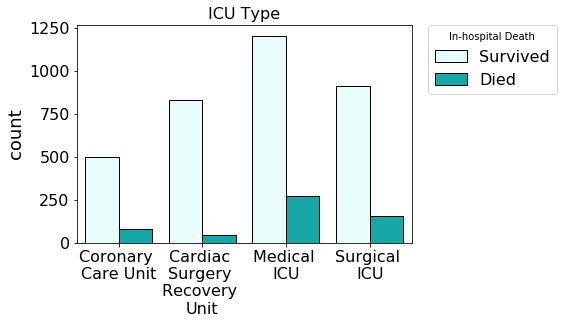

In [7]:
c=sns.countplot(data=df_ihd,x='ICUTypemax',color='c',hue="In-hospital_deathmax",edgecolor='black')
c.axes.set_xticklabels(['Coronary \nCare Unit','Cardiac \nSurgery \nRecovery \nUnit','Medical \nICU','Surgical \nICU'])
plt.xlabel('')
plt.title('ICU Type')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,title='In-hospital Death')

Text(0.5, 1.0, 'In-hospital Death')

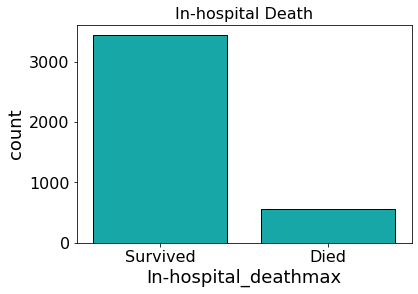

In [8]:
sns.countplot(data=df_ihd,x="In-hospital_deathmax",color='c',edgecolor='black')
plt.title("In-hospital Death")

In [9]:
df.rename(columns={"Length_of_staymean":"Length_of_stay","In-hospital_deathmax":"In-hospital_death","Survivalmean":"Survival","ICUTypemax":"ICUType"},inplace=True)

In [10]:
df["Length_of_stay"]=df["Length_of_stay"].astype('int')
df["Survival"]=df["Survival"].astype('int')
df["ICUType"]=df["ICUType"].astype('int').astype('category')
df["MechVentmax"]=df["MechVentmax"].astype('int').astype('category')
df["Genderfirst"]=df["Genderfirst"].astype('int').astype('category')
df["GCSmin"]=df["GCSmin"].astype('int')
df.rename(columns={"MechVentmax":"MechVent","Genderfirst":"Gender"},inplace=True)

In [11]:
df=df[df["Length_of_stay"]>0];df

,Patient,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemean,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,Gender,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,ICUType,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,MechVent,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,Length_of_stay,Survival,In-hospital_death,new_Heightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,new_Weightfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Hypertension,Tachypnea,Tachycardia,GCSComa,Diabetes,Hyperglycemia,Hypoglycemia,Urine24h,Renal Injury,BMI_Cat
0,132539,75.0,80.0,78.0,78.0,79.0,29.0,33.0,31.0,31.0,31.0,41.0,49.0,46.000000,46.0,46.0,54.0,2900.0,3000.0,3000.0,3000.0,3000.0,8.0,13.0,10.500000,10.5,13.0,0.6,0.7,0.700000,0.7,0.7,152.0,153.0,153.0,153.0,153.0,0.7,0.8,0.750000,0.75,0.8,42.0,81.0,58.765625,58.0,65.0,0.4,1.0,0.526667,0.5,1.0,14,0,115.0,205.0,160.000000,160.0,205.0,26.0,28.0,27.000000,27.0,26.0,30.3,33.7,32.500000,33.50,33.7,58.0,86.0,71.411765,73.0,73.0,4,4.0,4.4,4.20,4.20,4.4,1.4,2.3,1.883333,1.8,1.9,58.0,109.0,79.070455,78.0,92.33,0,1.5,1.9,1.700000,1.70,1.5,39.0,67.0,50.147059,49.0,65.0,58.67,92.33,71.559118,70.000,92.33,96.0,157.0,114.382353,110.0,147.0,136.0,137.0,136.500000,136.5,137.0,34.0,46.0,39.727273,39.0,40.0,81.0,228.0,138.600000,121.0,168.0,185.0,221.0,203.000000,203.0,221.0,12.0,24.0,17.666667,18.0,19.0,96.0,98.0,97.250000,97.5,98.0,83.0,156.0,117.058824,117.0,147.0,35.1,38.2,37.357143,37.70,35.1,1.6,2.7,2.133333,2.1,2.2,0.11,0.17,0.14,0.14,0.13,9.4,11.2,10.300000,10.30,11.2,7.32,7.44,7.386667,7.39,7.38,5,-1,0,170.2,35.1,38.2,37.357143,37.70,35.1,78.00,220.0,223.333333,222.5,222.5,220.0,27.155,131.25,92.330,65.0,147.0,1,1,0,0,2,0,0,2470.0,0,0
1,132540,75.0,80.0,78.0,78.0,79.0,29.0,33.0,31.0,31.0,31.0,41.0,49.0,46.000000,46.0,46.0,76.0,2900.0,3000.0,3000.0,3000.0,3000.0,16.0,21.0,18.333333,18.0,16.0,0.6,0.7,0.700000,0.7,0.7,152.0,153.0,153.0,153.0,153.0,0.8,1.3,1.100000,1.20,0.8,32.0,81.0,58.900000,59.0,67.0,0.4,1.0,0.560000,0.5,1.0,3,1,105.0,146.0,125.500000,125.5,105.0,21.0,24.0,22.333333,22.0,21.0,24.7,30.7,28.655556,28.80,24.7,65.0,90.0,80.729167,80.0,80.0,2,3.5,4.3,3.90,3.90,4.3,1.4,2.3,1.883333,1.8,1.9,43.0,100.0,76.478261,79.0,79.00,1,1.9,3.1,2.300000,2.10,3.1,38.0,67.0,56.714286,59.0,38.0,49.33,88.33,75.308571,78.165,49.33,72.0,131.0,112.500000,115.0,72.0,135.0,139.0,137.000000,137.0,139.0,33.0,46.0,38.857143,40.0,3

In [12]:
df.dtypes

Patient              category
ALPmin                float64
ALPmax                float64
ALPmean               float64
ALPmedian             float64
ALPfirst              float64
ALTmin                float64
ALTmax                float64
ALTmean               float64
ALTmedian             float64
ALTfirst              float64
ASTmin                float64
ASTmax                float64
ASTmean               float64
ASTmedian             float64
ASTfirst              float64
Agemean               float64
Albuminmin            float64
Albuminmax            float64
Albuminmean           float64
Albuminmedian         float64
Albuminfirst          float64
BUNmin                float64
BUNmax                float64
BUNmean               float64
BUNmedian             float64
BUNfirst              float64
Bilirubinmin          float64
Bilirubinmax          float64
Bilirubinmean         float64
Bilirubinmedian       float64
Bilirubinfirst        float64
Cholesterolmin        float64
Cholestero

In [13]:
kmf=KaplanMeierFitter()

T=df["Length_of_stay"]

E=df["In-hospital_death"]

kmf.fit(T,E)

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3937 total observations, 3384 right-censored observations>

Text(0.5, 1.0, "First 50 patient's Study Time")

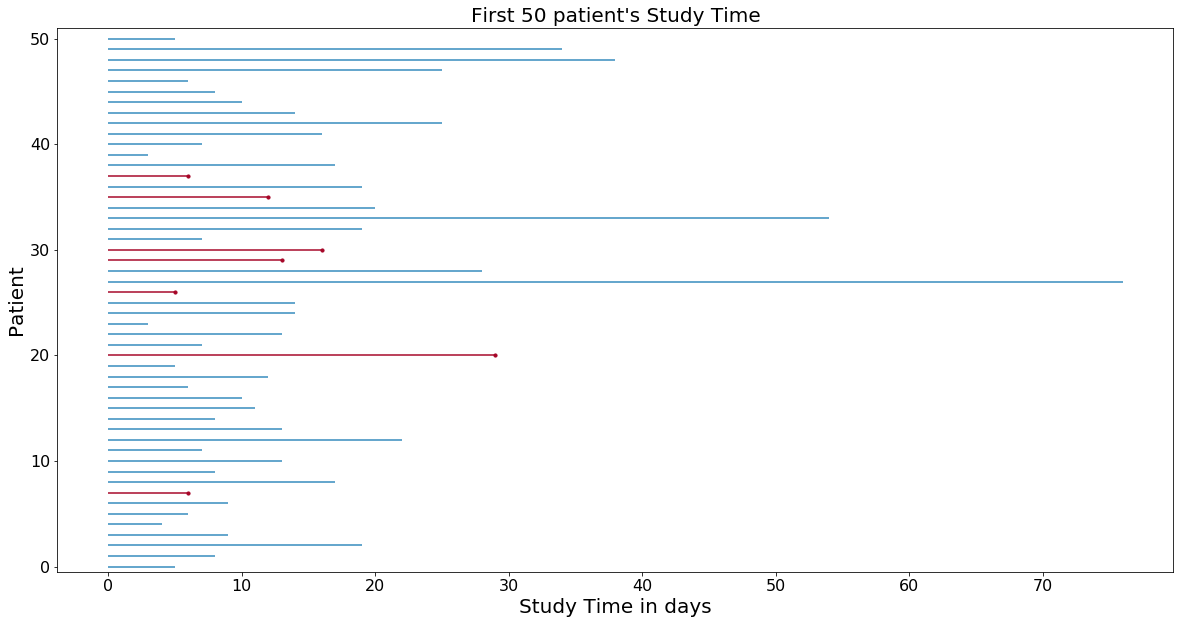

In [14]:
plt.figure(figsize=(20,10))
from lifelines.plotting import plot_lifetimes
plot_lifetimes(T.loc[:50], event_observed=E.loc[:50])
plt.xlabel("Study Time in days",fontsize=20)
plt.ylabel("Patient",fontsize=20)
plt.title("First 50 patient's Study Time",fontsize=20)

# Kaplan Meier Plot for categorical variables(regardless of var imp)

In [15]:
df.select_dtypes('category').columns

Index(['Patient', 'Gender', 'ICUType', 'MechVent', 'In-hospital_death',
       'Hypertension', 'Tachypnea', 'Tachycardia', 'GCSComa', 'Diabetes',
       'Hyperglycemia', 'Hypoglycemia', 'Renal Injury', 'BMI_Cat'],
      dtype='object')

In [16]:
LABEL_COLOUR_MAP = {-1:'m',
                0:'k',
               1:'c',
               2:'y',
               3:'b',
               4:'g',
               5:'r'}

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\

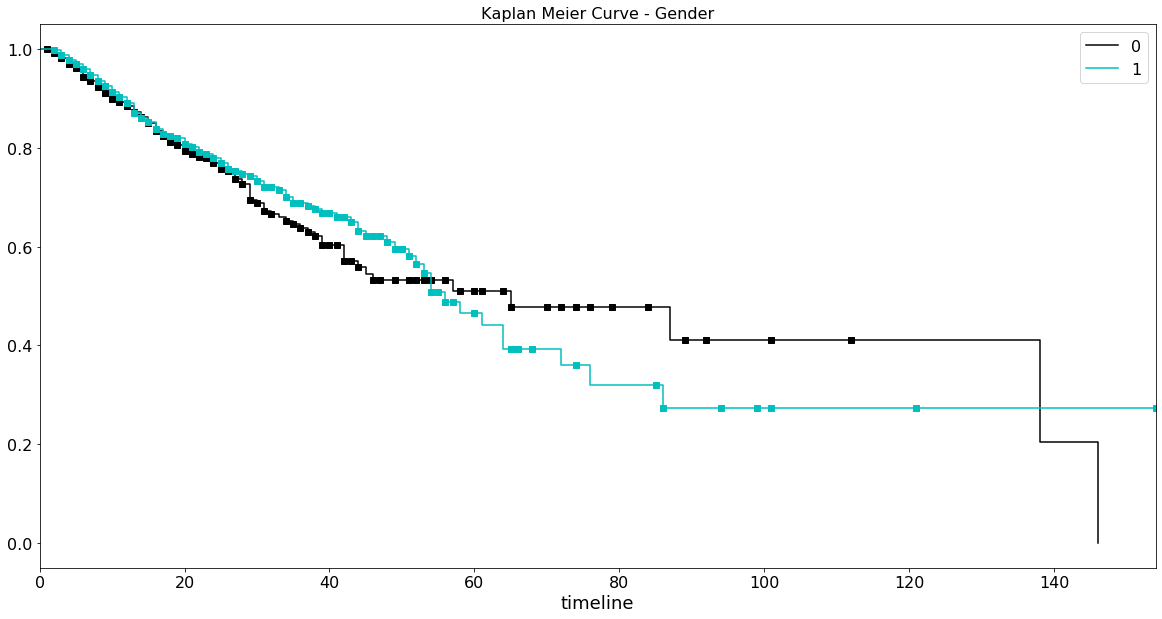

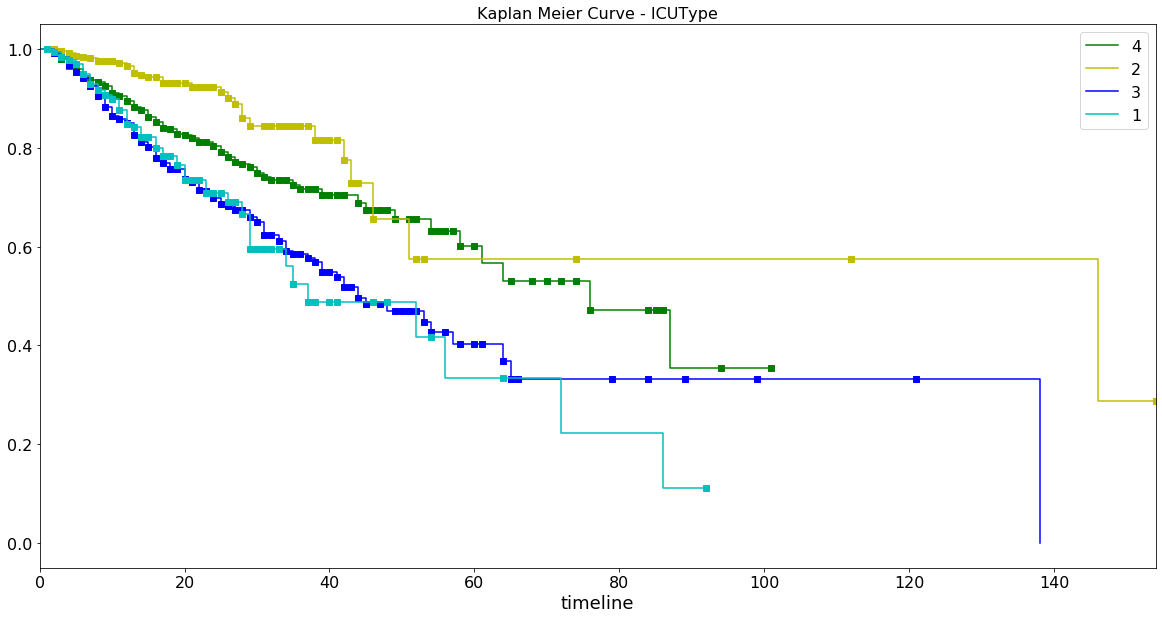

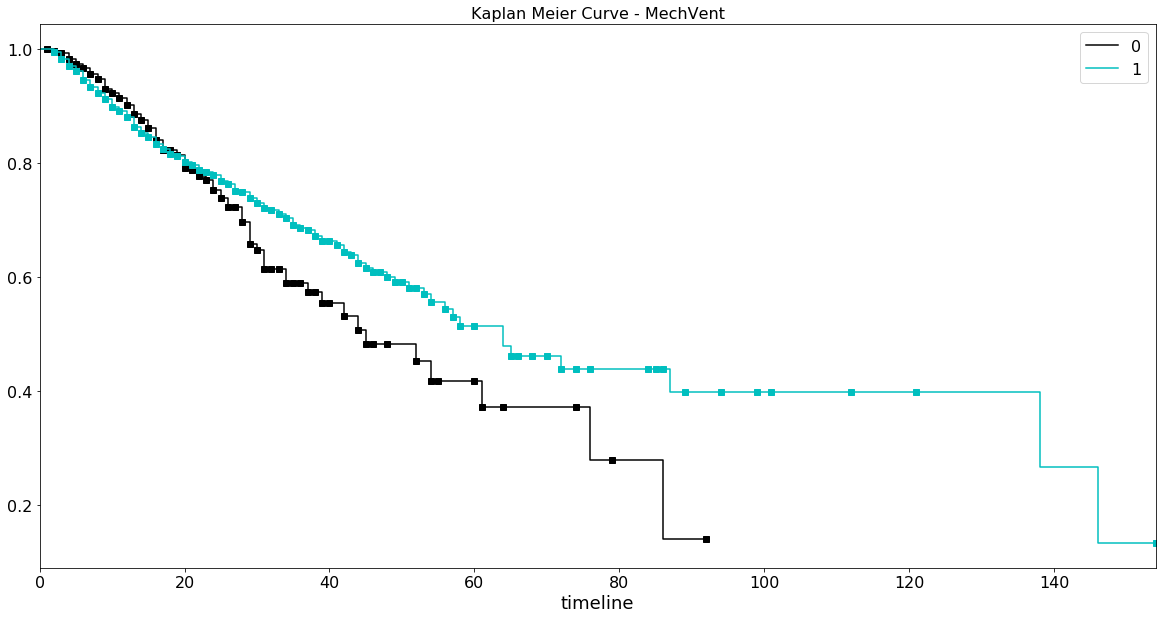

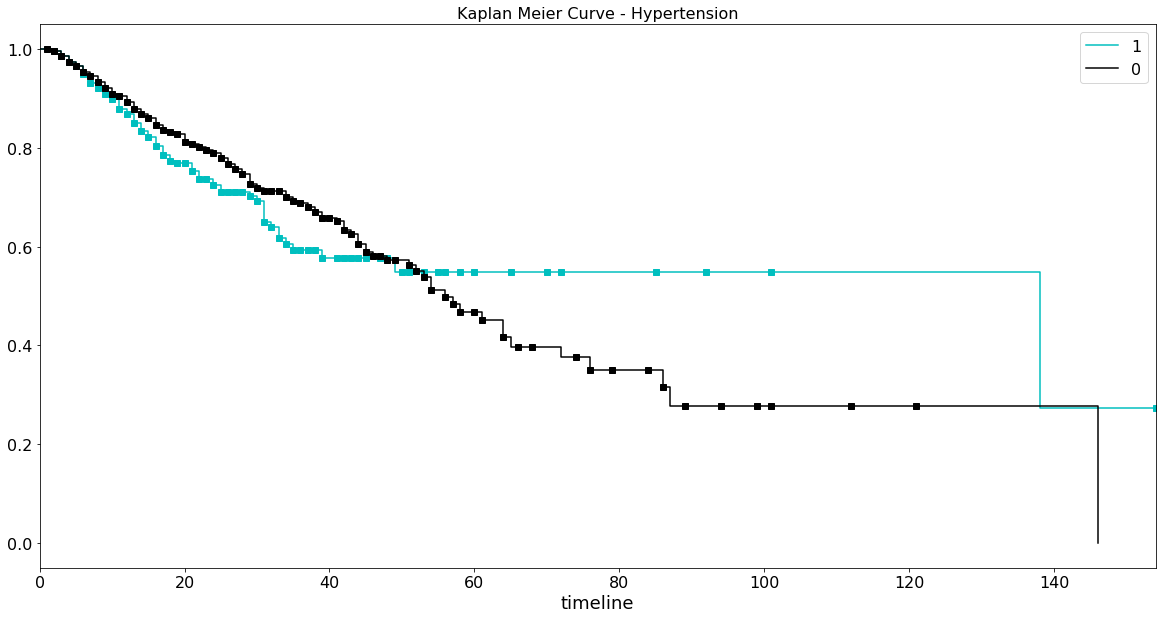

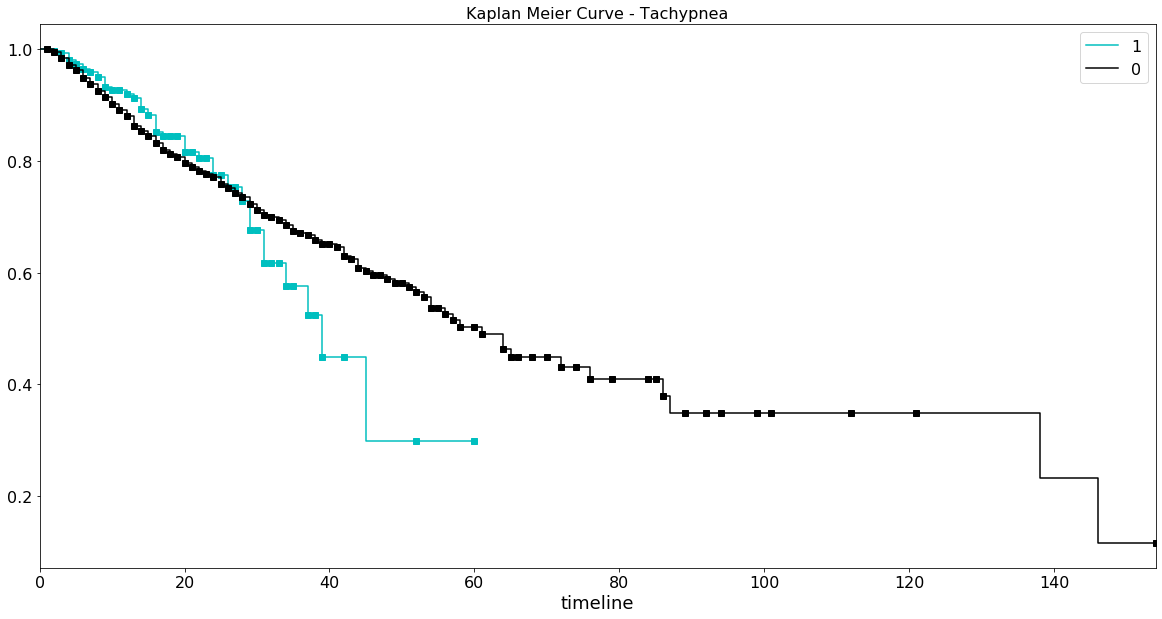

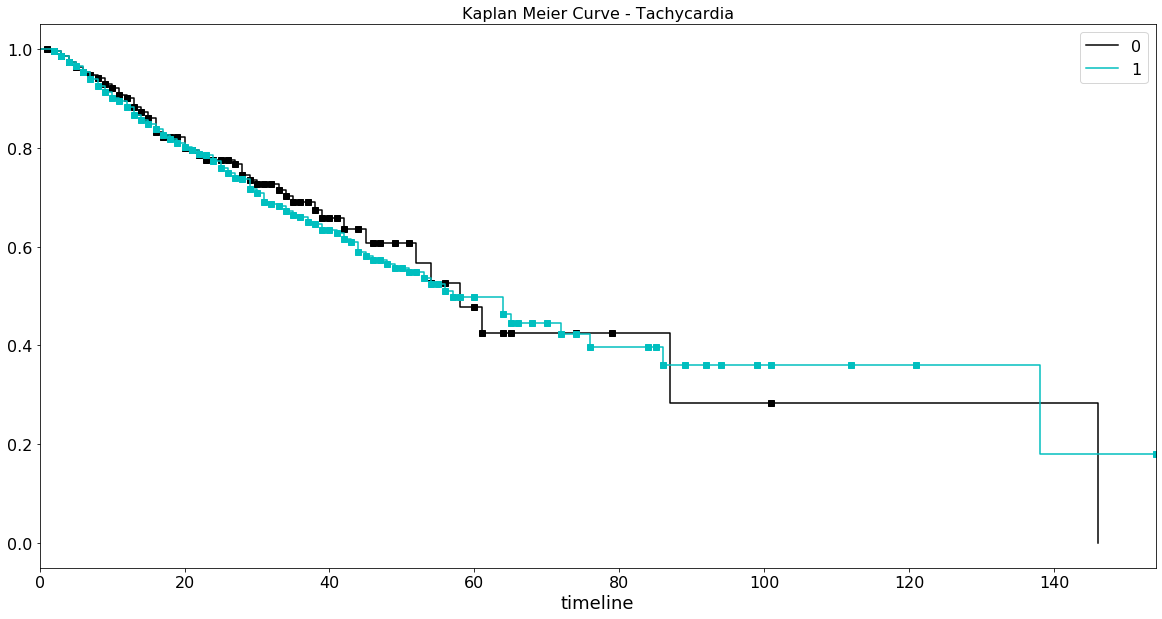

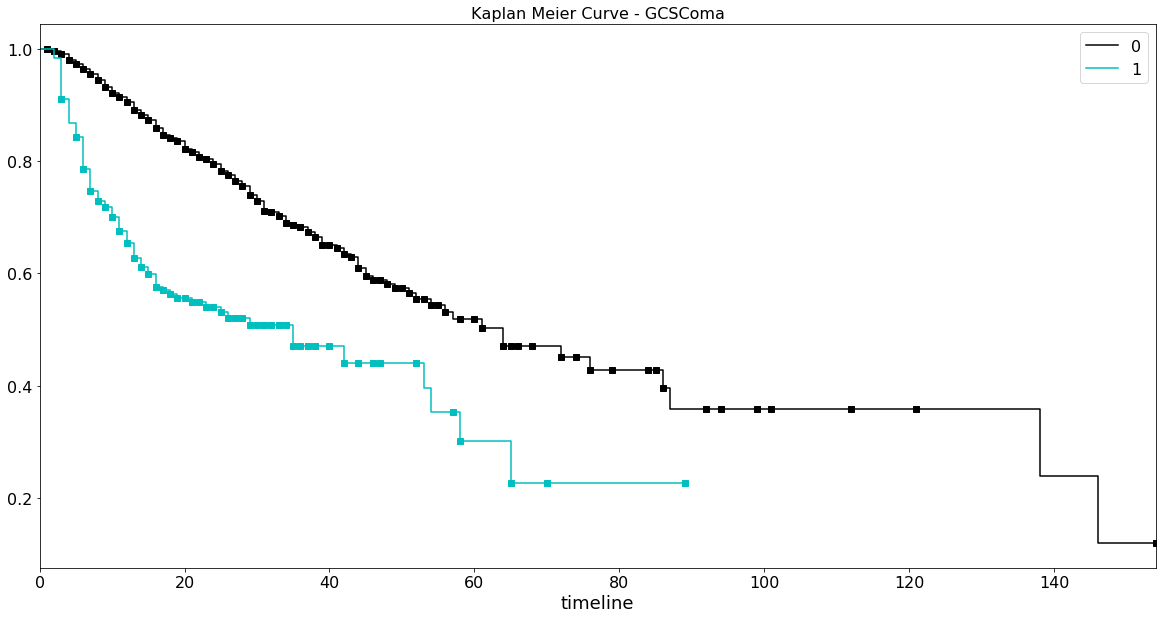

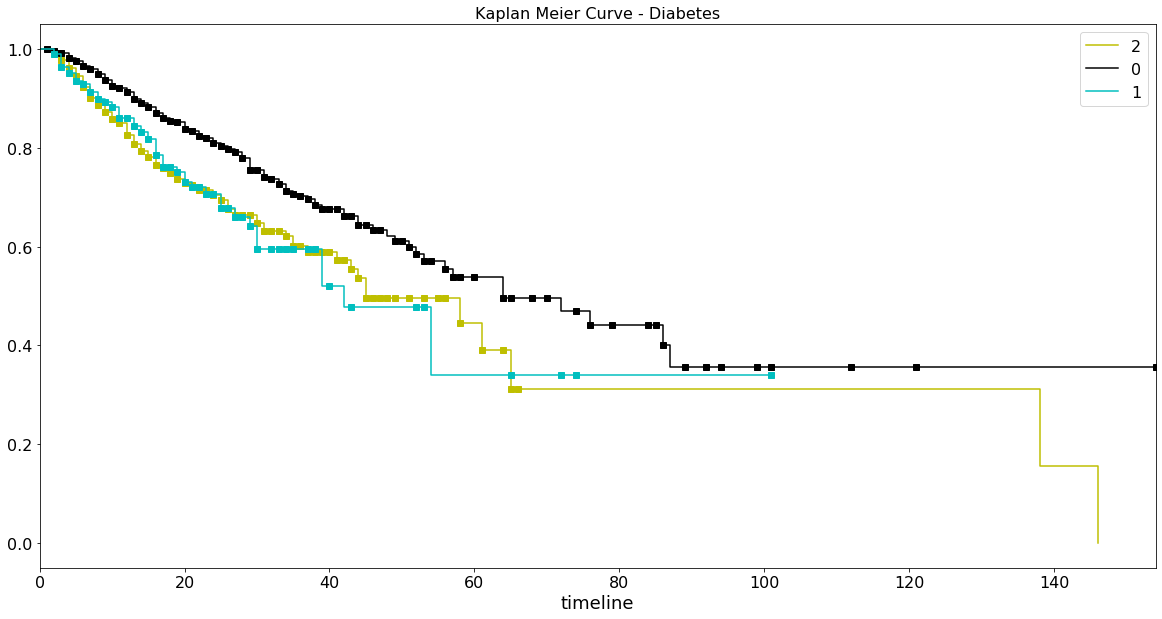

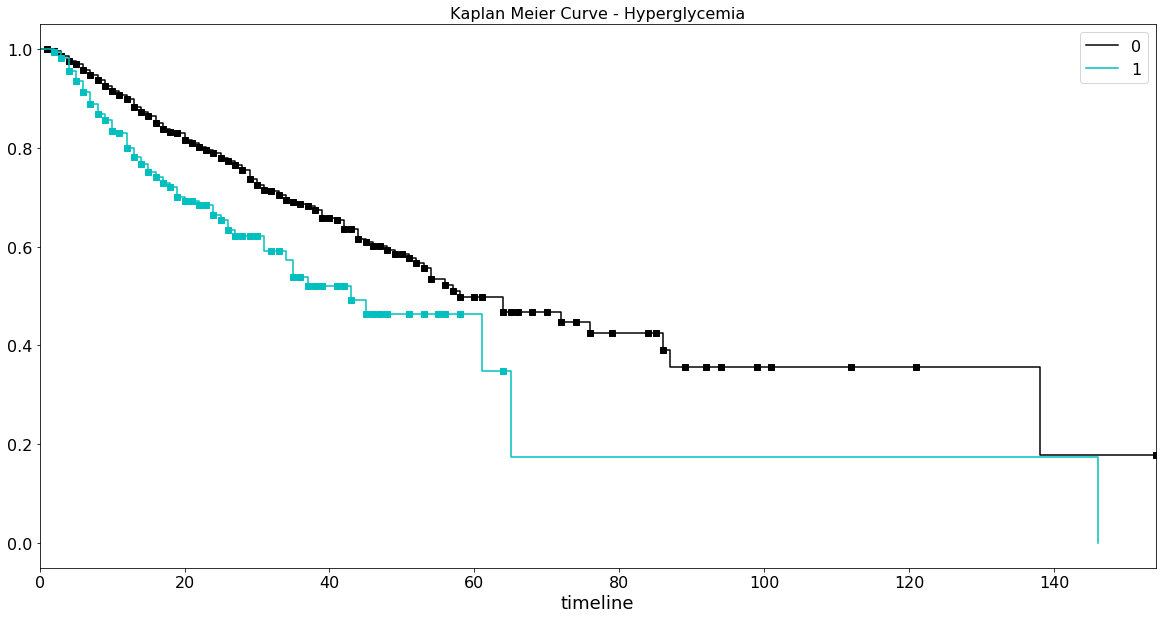

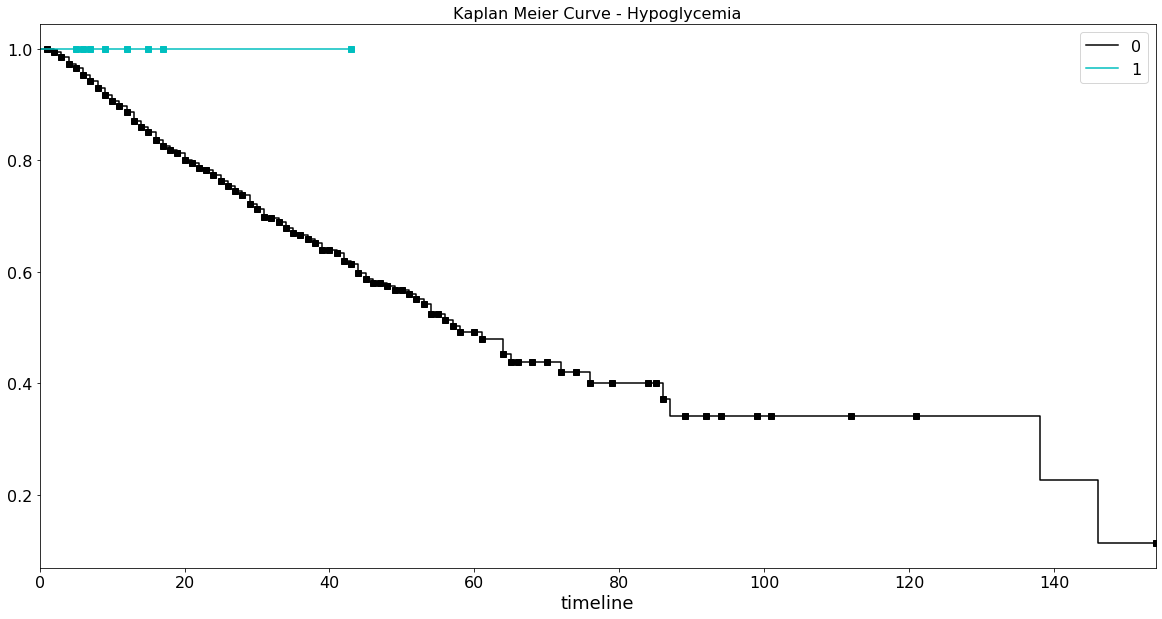

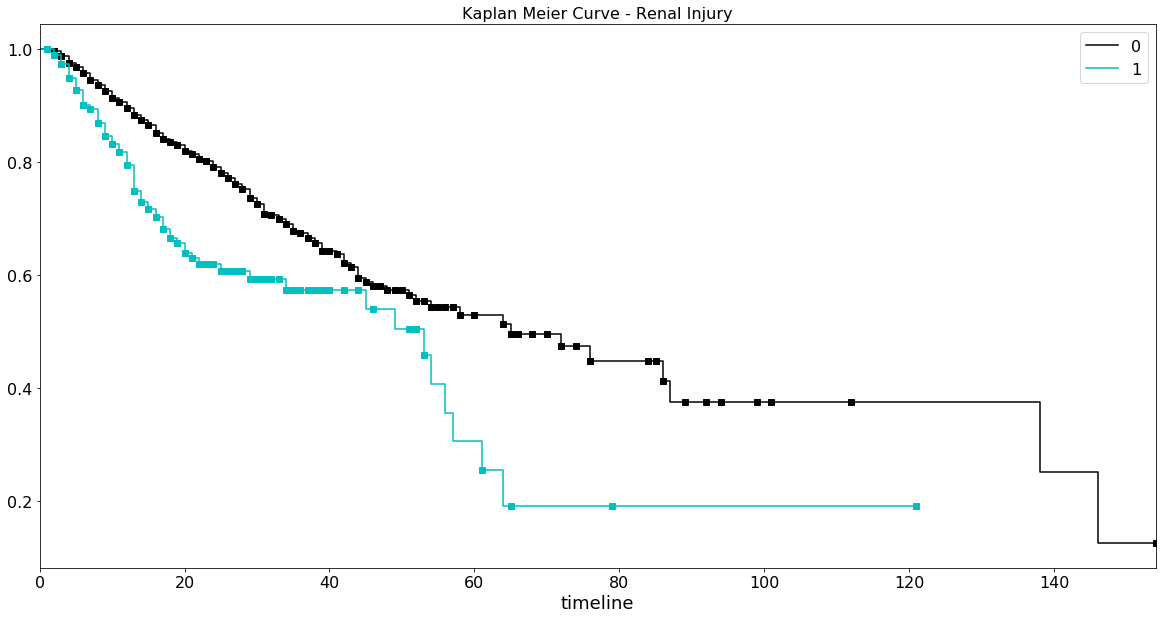

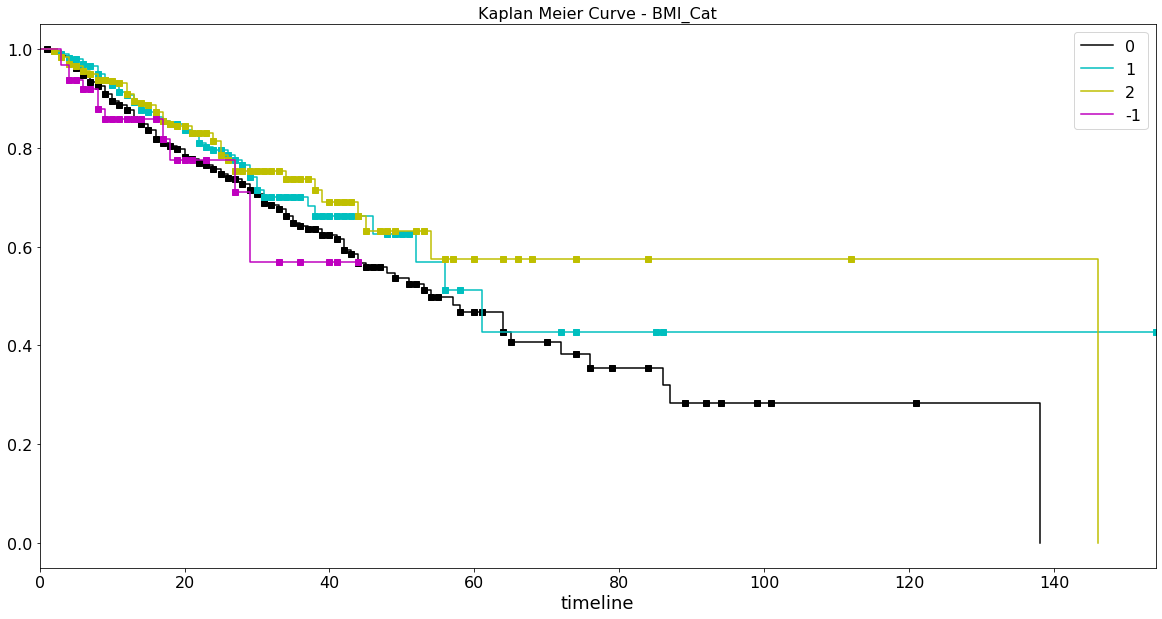

In [17]:
for cat in df.select_dtypes('category').columns.values:
    if cat in ["Patient","In-hospital_death"]:
        continue
    else:
        fig=plt.figure(figsize=(20,10))
        for i in df[cat].unique():
            label_colour=LABEL_COLOUR_MAP[i]
            ix= df[cat] == i
            kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
            kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_colour)
            plt.title("Kaplan Meier Curve - " +cat)

In [18]:
df_icu=df.copy()
df_icu["ICUType"]=df_icu["ICUType"].map({1:"Coronary Care Unit",2:"Cardiac Surgery Recovery Unit",3:"Medical ICU",4:"Surgical ICU"})


D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

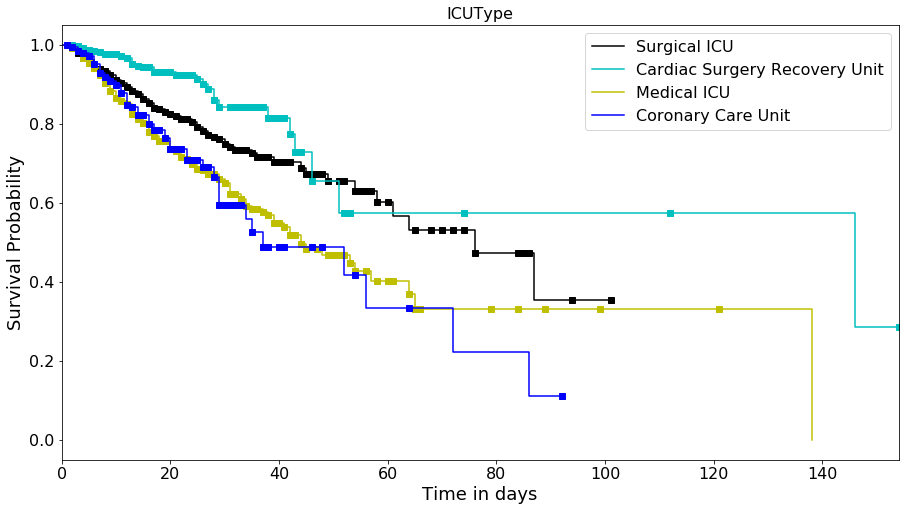

In [19]:
fig=plt.figure(figsize=(15,8))
for l,i in enumerate(df_icu["ICUType"].unique()):
    label_colour=LABEL_COLOUR_MAP[l]
    ix= df_icu["ICUType"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_colour)
    plt.title("ICUType")
    plt.ylabel("Survival Probability")
    plt.xlabel("Time in days")

In [20]:
df_gcs=df.copy()
df_gcs["GCSComa"]=df_icu["GCSComa"].map({1:"Severe",0:"Mild to Moderate"})


D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

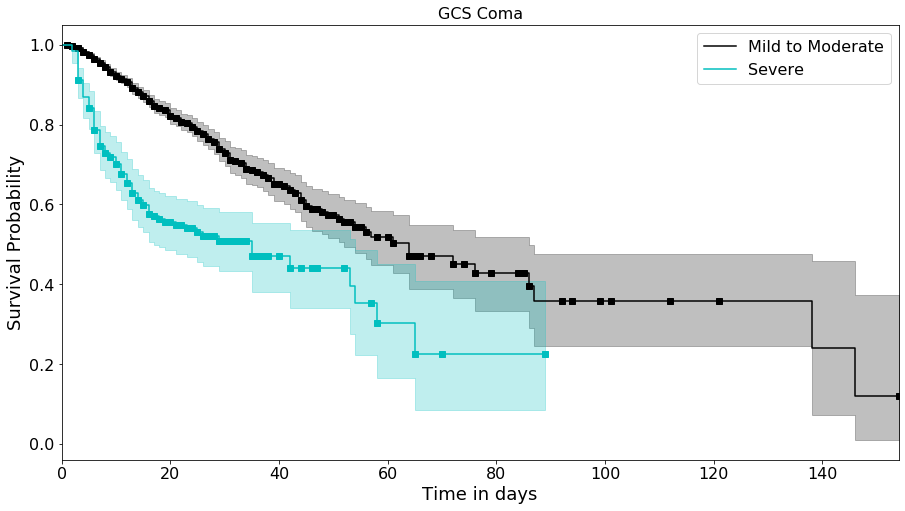

In [21]:
fig=plt.figure(figsize=(15,8))
for l,i in enumerate(df_gcs["GCSComa"].unique()):
    label_colour=LABEL_COLOUR_MAP[l]
    ix= df_gcs["GCSComa"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_colour)
    plt.title("GCS Coma")
    plt.ylabel("Survival Probability")
    plt.xlabel("Time in days")

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


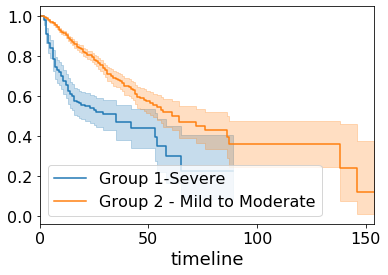

In [22]:
from lifelines import KaplanMeierFitter
group1=df[df['GCSComa']==1]
group2=df[df['GCSComa']==0]
T=group1['Length_of_stay']
E=group1['In-hospital_death']
T1=group2['Length_of_stay']
E1=group2['In-hospital_death']

kmf = KaplanMeierFitter()

ax = plt.subplot(111)
ax = kmf.fit(T, E, label="Group 1-Severe").plot(ax=ax)
ax = kmf.fit(T1, E1, label="Group 2 - Mild to Moderate").plot(ax=ax)

#logrank_test
from lifelines.statistics import logrank_test
results=logrank_test(T,T1,event_observed_A=E, event_observed_B=E1)
results.print_summary()

# High Var Imp (continuous variables)

In [23]:
df2=df.copy()
df2.describe()


,ALPmin,ALPmax,ALPmean,ALPmedian,ALPfirst,ALTmin,ALTmax,ALTmean,ALTmedian,ALTfirst,ASTmin,ASTmax,ASTmean,ASTmedian,ASTfirst,Agemean,Albuminmin,Albuminmax,Albuminmean,Albuminmedian,Albuminfirst,BUNmin,BUNmax,BUNmean,BUNmedian,BUNfirst,Bilirubinmin,Bilirubinmax,Bilirubinmean,Bilirubinmedian,Bilirubinfirst,Cholesterolmin,Cholesterolmax,Cholesterolmean,Cholesterolmedian,Cholesterolfirst,Creatininemin,Creatininemax,Creatininemean,Creatininemedian,Creatininefirst,DiasABPmin,DiasABPmax,DiasABPmean,DiasABPmedian,DiasABPfirst,FiO2min,FiO2max,FiO2mean,FiO2median,FiO2first,GCSmin,Glucosemin,Glucosemax,Glucosemean,Glucosemedian,Glucosefirst,HCO3min,HCO3max,HCO3mean,HCO3median,HCO3first,HCTmin,HCTmax,HCTmean,HCTmedian,HCTfirst,HRmin,HRmax,HRmean,HRmedian,HRfirst,Kmin,Kmax,Kmean,Kmedian,Kfirst,Lactatemin,Lactatemax,Lactatemean,Lactatemedian,Lactatefirst,MAPmin,MAPmax,MAPmean,MAPmedian,MAPfirst,Mgmin,Mgmax,Mgmean,Mgmedian,Mgfirst,NIDiasABPmin,NIDiasABPmax,NIDiasABPmean,NIDiasABPmedian,NIDiasABPfirst,NIMAPmin,NIMAPmax,NIMAPmean,NIMAPmedian,NIMAPfirst,NISysABPmin,NISysABPmax,NISysABPmean,NISysABPmedian,NISysABPfirst,Namin,Namax,Namean,Namedian,Nafirst,PaCO2min,PaCO2max,PaCO2mean,PaCO2median,PaCO2first,PaO2min,PaO2max,PaO2mean,PaO2median,PaO2first,Plateletsmin,Plateletsmax,Plateletsmean,Plateletsmedian,Plateletsfirst,RespRatemin,RespRatemax,RespRatemean,RespRatemedian,RespRatefirst,SaO2min,SaO2max,SaO2mean,SaO2median,SaO2first,SysABPmin,SysABPmax,SysABPmean,SysABPmedian,SysABPfirst,Tempmin,Tempmax,Tempmean,Tempmedian,Tempfirst,TroponinImin,TroponinImax,TroponinImean,TroponinImedian,TroponinIfirst,TroponinTmin,TroponinTmax,TroponinTmean,TroponinTmedian,TroponinTfirst,WBCmin,WBCmax,WBCmean,WBCmedian,WBCfirst,pHmin,pHmax,pHmean,pHmedian,pHfirst,Length_of_stay,Survival,new_Heightfirst,new_Tempmin,new_Tempmax,new_Tempmean,new_Tempmedian,new_Tempfirst,new_Weightfirst,PaO2FiO2min,PaO2FiO2max,PaO2FiO2mean,PaO2FiO2median,PaO2FiO2first,BMI,Urinemean48h,MeanMAPfirst,MeanDiasABPfirst,MeanSysABPfirst,Urine24h
count,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.00000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.00000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.00000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,3937.000000,393

In [24]:
df2["Binned_BUNmedian"]=pd.qcut(df2['BUNmedian'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

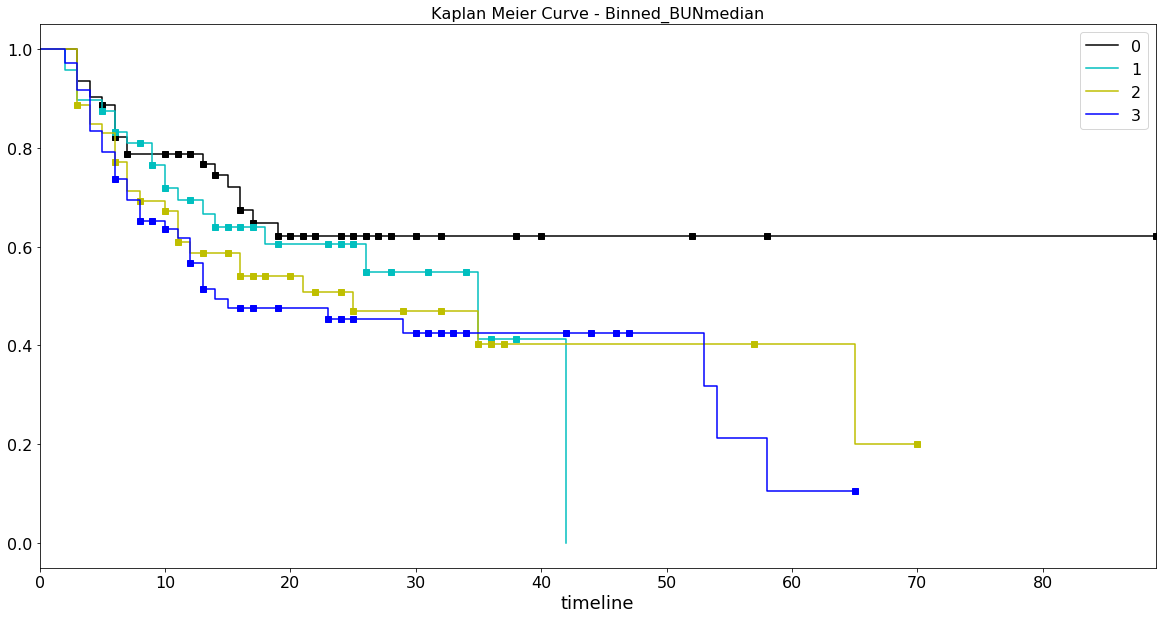

In [25]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_BUNmedian"].unique():
    label_color = LABEL_COLOUR_MAP[i] 
    ix= df2["Binned_BUNmedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_BUNmedian")

In [26]:
df2["Binned_FiO2median"]=pd.qcut(df2['FiO2median'],q=4,labels=[0,1,2],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

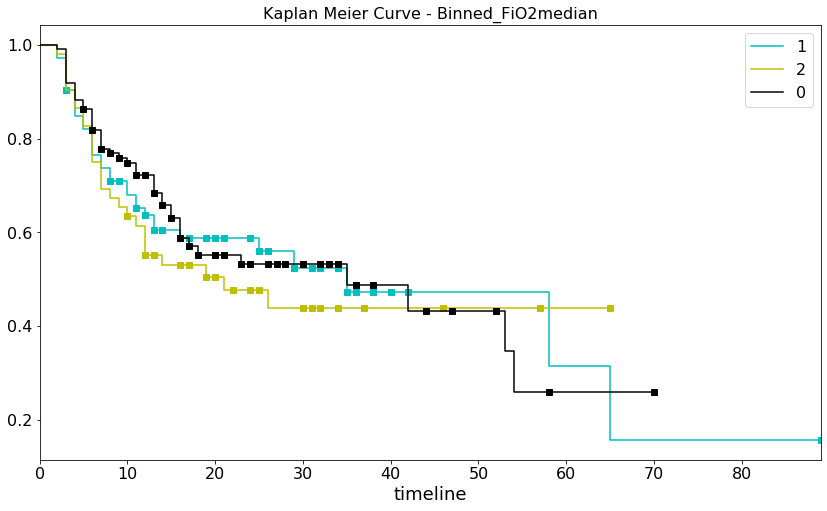

In [27]:
fig=plt.figure(figsize=(14,8))
for i in df2["Binned_FiO2median"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_FiO2median"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_FiO2median")

In [28]:
df2["Binned_Bilirubinmedian"]=pd.qcut(df2['Bilirubinmedian'],q=4,labels=[0,1],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

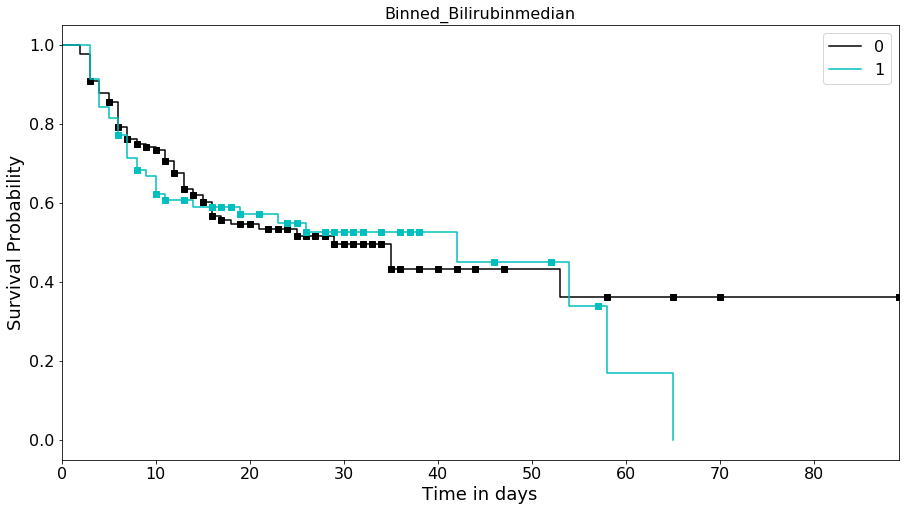

In [29]:
fig=plt.figure(figsize=(15,8))
for i in df2["Binned_Bilirubinmedian"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_Bilirubinmedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Binned_Bilirubinmedian")
    plt.ylabel("Survival Probability")
    plt.xlabel("Time in days")

In [30]:
df2["Binned_HRmedian"]=pd.qcut(df2['HRmedian'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

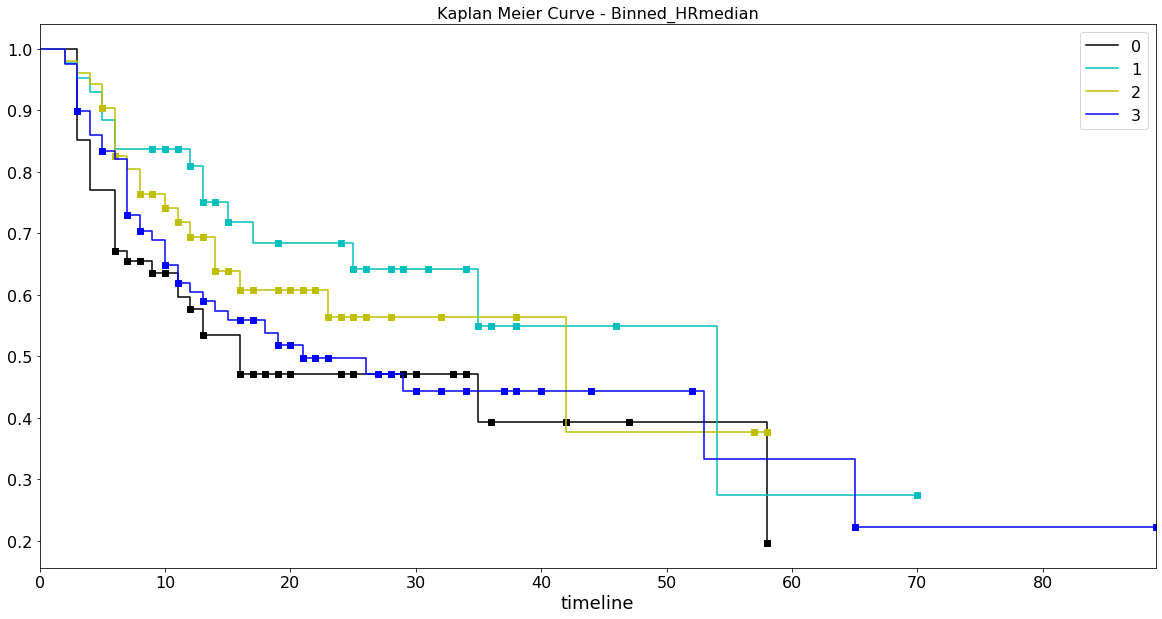

In [31]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_HRmedian"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_HRmedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_HRmedian")

In [32]:
df2["Binned_Lactatemedian"]=pd.qcut(df2['Lactatemedian'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

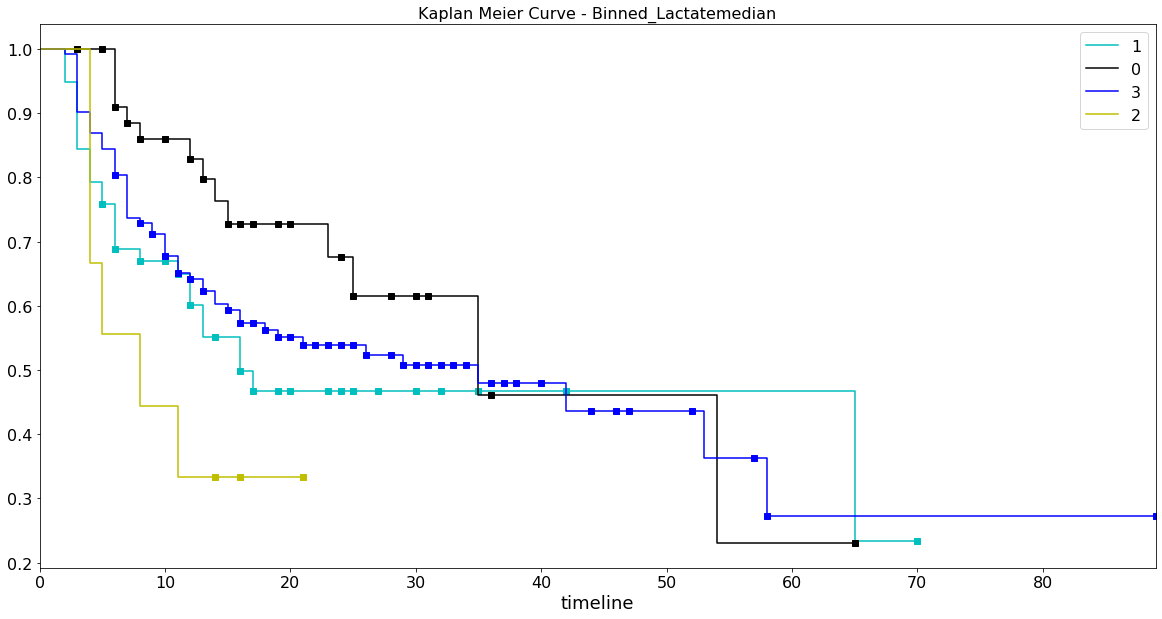

In [33]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_Lactatemedian"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_Lactatemedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_Lactatemedian")

In [38]:
df2["Binned_Agemean"]=pd.qcut(df2['Agemean'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\

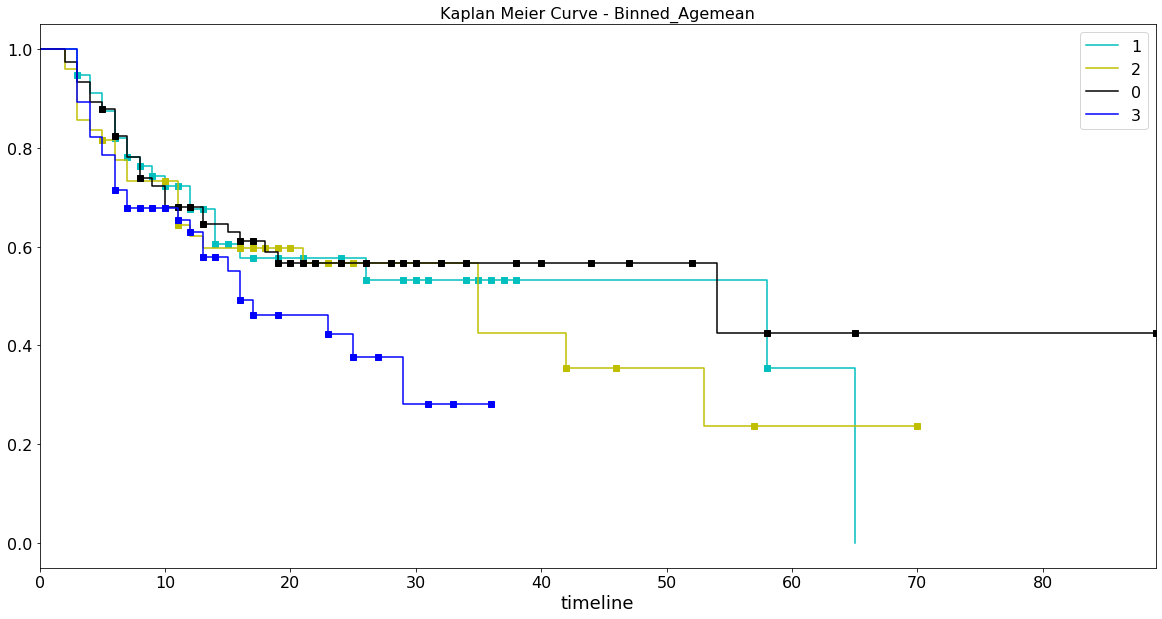

In [39]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_Agemean"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_Agemean"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_Agemean")

In [40]:
df2["Binned_TroponinImedian"]=pd.qcut(df2['TroponinImedian'],q=4,labels=[0,1],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

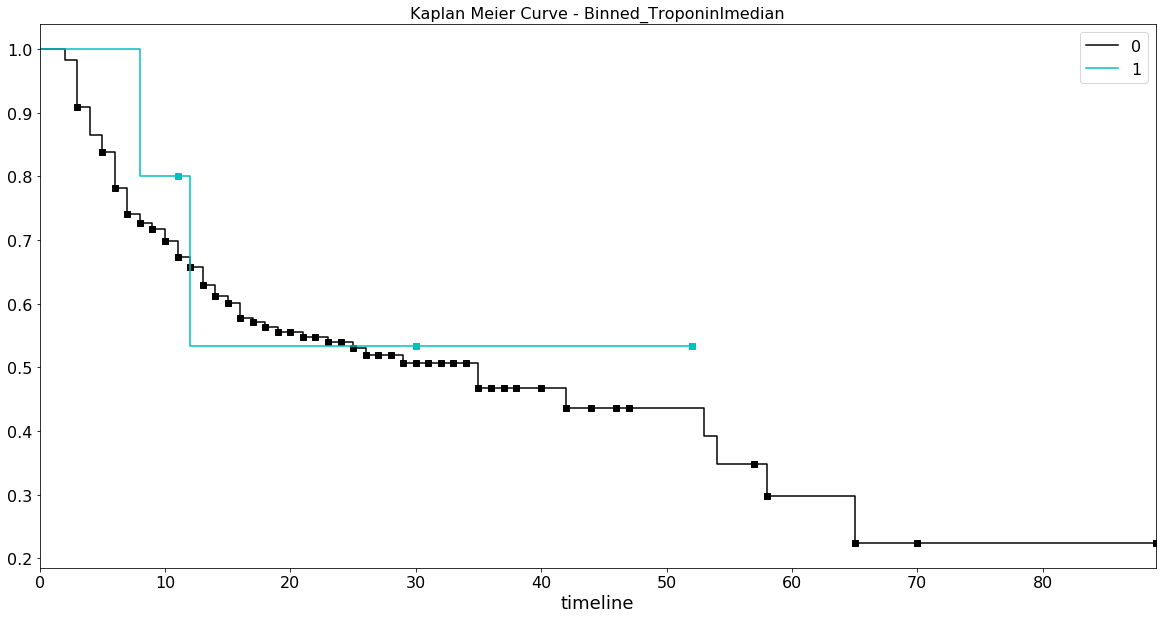

In [41]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_TroponinImedian"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_TroponinImedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_TroponinImedian")

In [42]:
df2["Binned_WBCmedian"]=pd.qcut(df2['WBCmedian'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

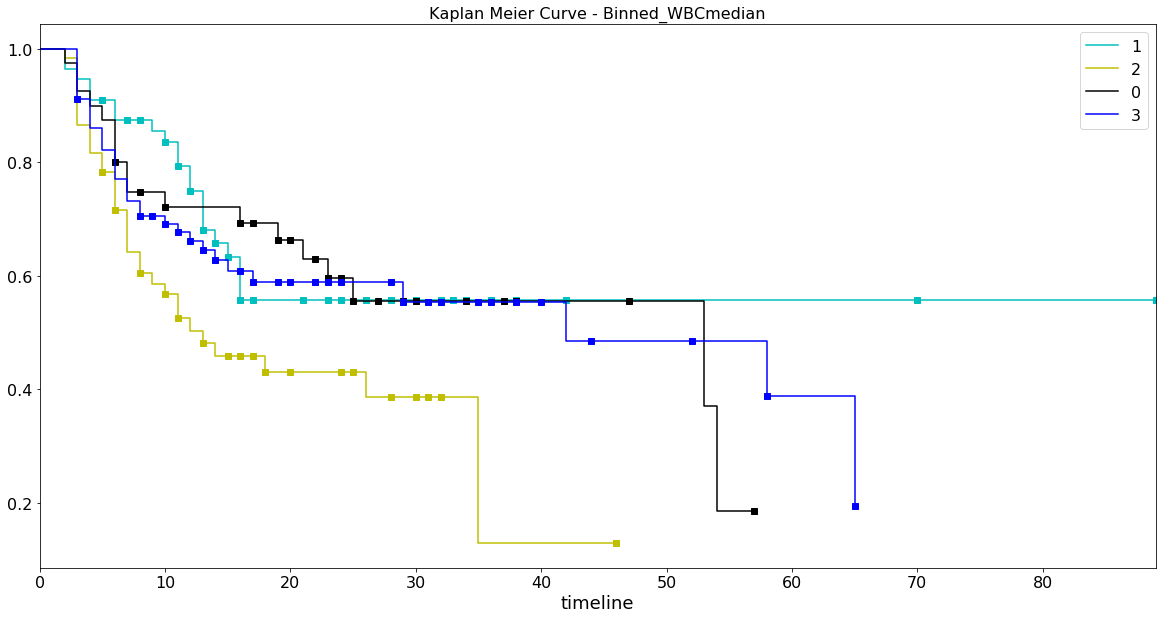

In [43]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_WBCmedian"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_WBCmedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_WBCmedian")

In [44]:
df2["Binned_new_Tempmedian"]=pd.qcut(df2['new_Tempmedian'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

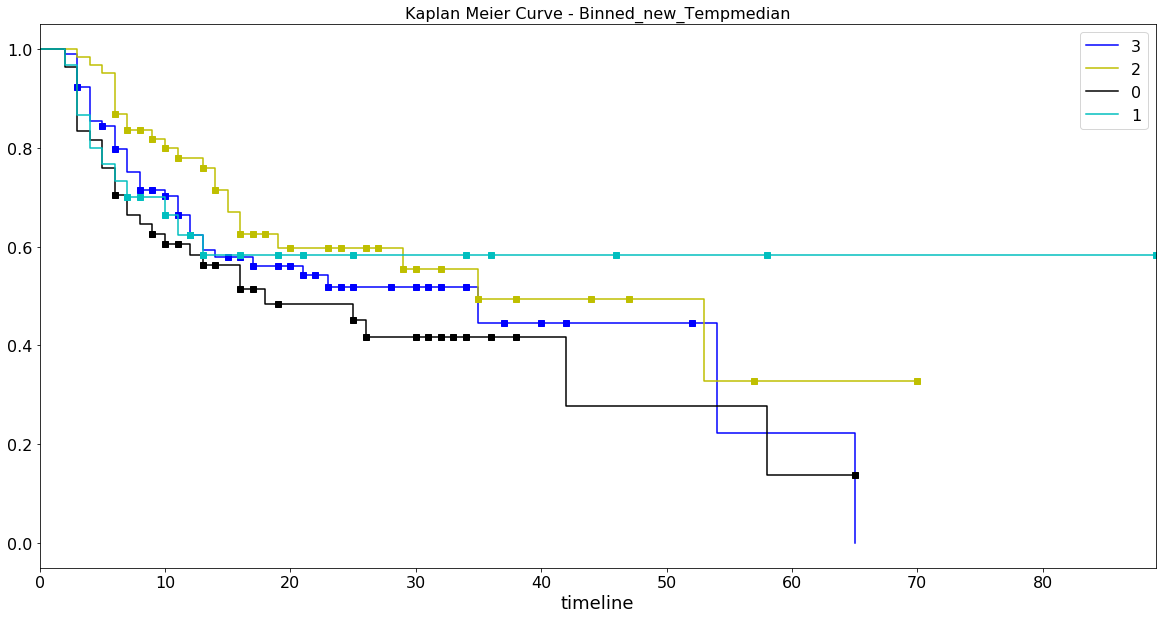

In [45]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_new_Tempmedian"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_new_Tempmedian"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_new_Tempmedian")

In [46]:
df2['new_Weightfirst'].sort_values(ascending=True)

2745     31.7
2533     32.0
1910     34.6
1184     35.0
3588     36.0
        ...  
774     138.4
2495    138.5
3662    138.8
1186    139.0
1971    139.0
Name: new_Weightfirst, Length: 3937, dtype: float64

In [47]:
df2["Binned_new_Weightfirst"]=pd.qcut(df2['new_Weightfirst'],q=4,labels=[0,1,2,3],duplicates='drop')
df2=df2.sort_values(by=["Binned_new_Weightfirst"],ascending=True)
df2["Binned_new_Weightfirst"]=df2["Binned_new_Weightfirst"].replace({0:"<67kg",1:"<78kg",2:"<90kg",3:"<139kg"})

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

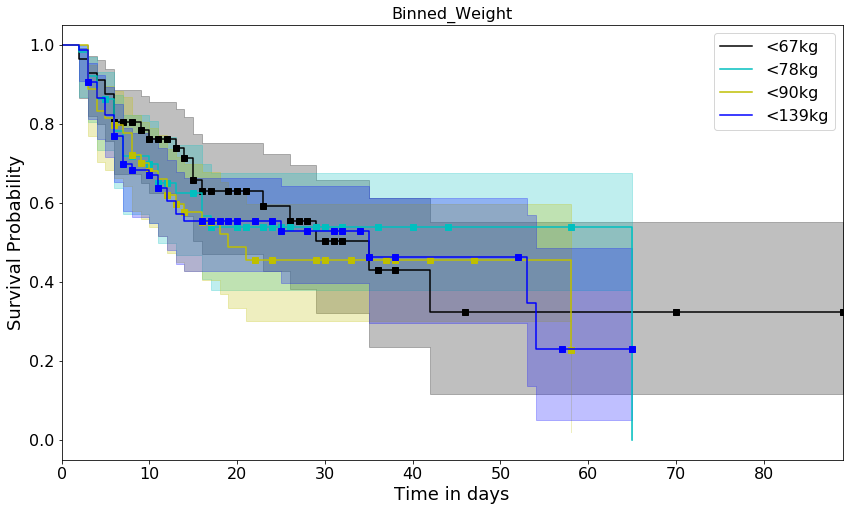

In [48]:
fig=plt.figure(figsize=(14,8))
for y,i in enumerate(df2["Binned_new_Weightfirst"].unique()):
    label_color = LABEL_COLOUR_MAP[y]
    ix= df2["Binned_new_Weightfirst"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=True,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Binned_Weight")
    plt.ylabel("Survival Probability")
    plt.xlabel("Time in days")

# Low Var Imp

In [49]:
df2["Binned_Urinemean48h"]=pd.qcut(df2['Urinemean48h'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

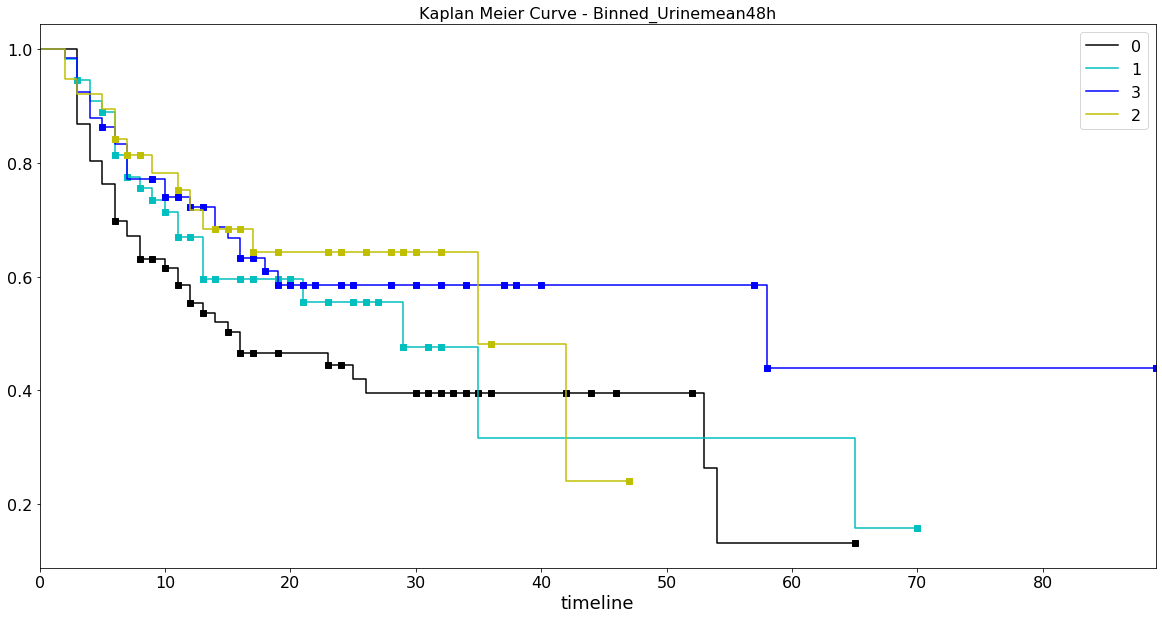

In [50]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_Urinemean48h"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_Urinemean48h"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_Urinemean48h")

In [51]:
df2["Binned_Plateletsmax"]=pd.qcut(df2['Plateletsmax'],q=4,labels=[0,1,2,3],duplicates='drop')

D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\pandas\plotting\_matplotlib\core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)
D:\Users\andy\Anaconda3\envs\vaex\lib\site-packages\lifelines\utils\__init__.py:1164: UserWarning: Attempting to convert an unexpected datatype 'category' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)
D:\Users\andy\Anacond

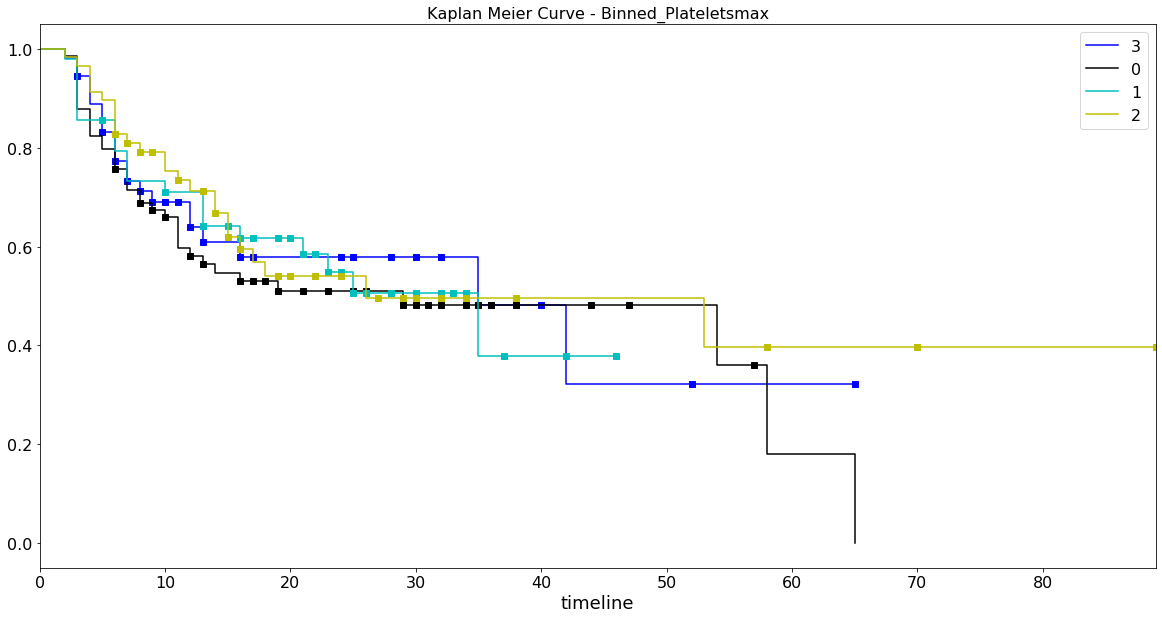

In [52]:
fig=plt.figure(figsize=(20,10))
for i in df2["Binned_Plateletsmax"].unique():
    label_color = LABEL_COLOUR_MAP[i]
    ix= df2["Binned_Plateletsmax"] == i
    kmf.fit(T.loc[ix,],E.loc[ix,],label=i)
    kmf.plot(ci_show=False,show_censors=True, censor_styles={'ms': 6, 'marker': 's'},c=label_color)
    plt.title("Kaplan Meier Curve - Binned_Plateletsmax")